# CARGA DE LIBRERIAS

Cargo las librerias que se necesitan

In [1]:
!pip install pandas
import pandas

In [2]:
!pip install matplotlib
import matplotlib

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

# ANALISIS PREVIO DEL DATA SET

In [4]:
data = pd.read_csv('./airbnb-listings-extract.csv',sep=';', decimal='.')
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [5]:
print('Number of records -->', data.shape[0])
print('Number of features -->', data.shape[1])

Number of records --> 14780
Number of features --> 89


In [6]:
data.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

In [7]:
#data.isnull().any()
#data.isnull().sum()
(data.isnull().sum().sort_values(ascending = False)/len(data)).head(9)


Has Availability        0.999188
Host Acceptance Rate    0.997361
Jurisdiction Names      0.984641
License                 0.976387
Square Feet             0.959540
Monthly Price           0.759066
Weekly Price            0.757104
Notes                   0.618133
Security Deposit        0.576725
dtype: float64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14780.0,1.028089e+07,5.564829e+06,1.862800e+04,5.554732e+06,1.133492e+07,1.532631e+07,1.910969e+07
Scrape ID,14780.0,2.017037e+13,5.667971e+08,2.016010e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017062e+13
Host ID,14780.0,3.608080e+07,3.425360e+07,1.745300e+04,6.787360e+06,2.464875e+07,5.432919e+07,1.247534e+08
Host Response Rate,12881.0,9.482346e+01,1.521599e+01,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Host Listings Count,14777.0,1.251364e+01,3.409022e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Host Total Listings Count,14777.0,1.251364e+01,3.409022e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Latitude,14780.0,4.049763e+01,4.641387e+00,-3.785118e+01,4.040973e+01,4.041947e+01,4.043092e+01,5.596691e+01
Longitude,14780.0,-3.858041e+00,1.412315e+01,-1.231313e+02,-3.707604e+00,-3.700785e+00,-3.684057e+00,1.533714e+02
Accommodates,14780.0,3.277808e+00,2.097291e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,14725.0,1.281732e+00,6.585171e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


Elimino las variables que son URL,Scraped y los ID. Ya que no aportan nada de información. Lo hago antes de separar en train y test ya que no hago ningúun tipo de análisis sobre esta información.

In [8]:
data = pd.DataFrame.drop(data, columns=[
    'ID',
    'Listing Url',
    'Thumbnail Url',
    'Host ID',
    'Medium Url',
    'Picture Url',
    'XL Picture Url',
    'Host URL',
    'Host Thumbnail Url',
    'Host Picture Url',
    'Scrape ID',
    'Last Scraped'
])
print(list(data))

['Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Calendar last Scraped', 'Number of Reviews', 'F

Elimino las variables que tienen que ver con texto que se añade en la web para describir la propiedad y que ya se encuentra resumida en datos numéricos. Además por que no voy a realizar Text Analisis.

In [9]:
data = pd.DataFrame.drop(data, columns=[
    'Name',
    'Summary',
    'Space',
    'Description',
    'Host Verifications',
    'Neighborhood Overview',
    'Notes',
    'Transit',
    'Access',
    'Interaction',
    'House Rules',
    'Host Name',
    'Host About',
    'Host Response Time',
    'Calendar last Scraped',
    'Features'
])
data.shape[1]

61

Con este análisis EDA me he quedado con 61 variables  de 89 variables iniciales. Sobre las variables resultantes se tendrá que ir limpiando pero ya analizando la perdida de informaciónn sobre la variable a predecir. Este análisis se hace una vez separado los datos en test y train.

# PREPROCESADO Y LIMPIEZA DE DATOS

Se hace la división de los datos en train y test

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# Se empieza a trabajar con el data set en train y después se 
#realizan las mismas modificaciones en test. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 61)
Dimensiones del dataset de test: (2956, 61)


In [12]:
(df.isnull().sum().sort_values(ascending = False)/len(data)).head(5)

Has Availability        0.799391
Host Acceptance Rate    0.797970
Jurisdiction Names      0.788227
License                 0.781258
Square Feet             0.767930
dtype: float64

Como esta variables tienen muchos valores nulos las eliminamos

In [13]:
df = pd.DataFrame.drop(df, columns=[
    'Has Availability',
    'Host Acceptance Rate',
    'Jurisdiction Names',
    'License',
    'Square Feet'
])
df.shape[1]

56

In [15]:
!pip install seaborn
import seaborn

     |████████████████████████████████| 292 kB 5.5 MB/s eta 0:00:01


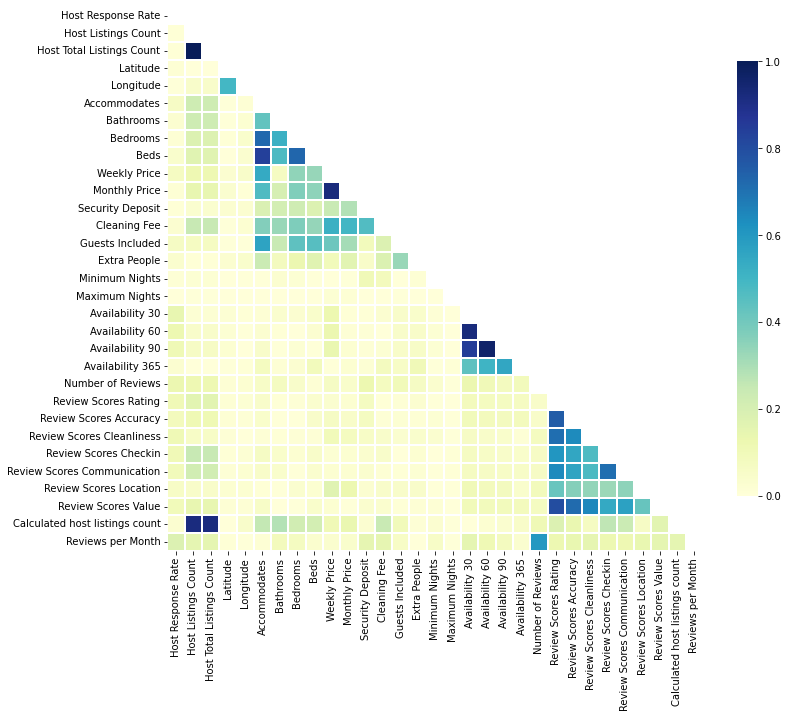

In [16]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()
plt.show()

Se hace un análisis de las correlaciones para eliminar la colinealidad entre las variables. Primero se realiza con seaborn pero solo selecciona las variables numéricas y después se realizan con dython ya que también tiene en cuenta las categóricas.

In [17]:
!pip install dython
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['Experiences Offered',
 'Host Since',
 'Host Location',
 'Host Neighbourhood',
 'Street',
 'Neighbourhood',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'City',
 'State',
 'Zipcode',
 'Market',
 'Smart Location',
 'Country Code',
 'Country',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Amenities',
 'Calendar Updated',
 'First Review',
 'Last Review',
 'Cancellation Policy',
 'Geolocation']

In [18]:
from dython.nominal import associations


In [19]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['Experiences Offered',
 'Host Since',
 'Host Location',
 'Host Neighbourhood',
 'Street',
 'Neighbourhood',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'City',
 'State',
 'Zipcode',
 'Market',
 'Smart Location',
 'Country Code',
 'Country',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Amenities',
 'Calendar Updated',
 'First Review',
 'Last Review',
 'Cancellation Policy',
 'Geolocation']

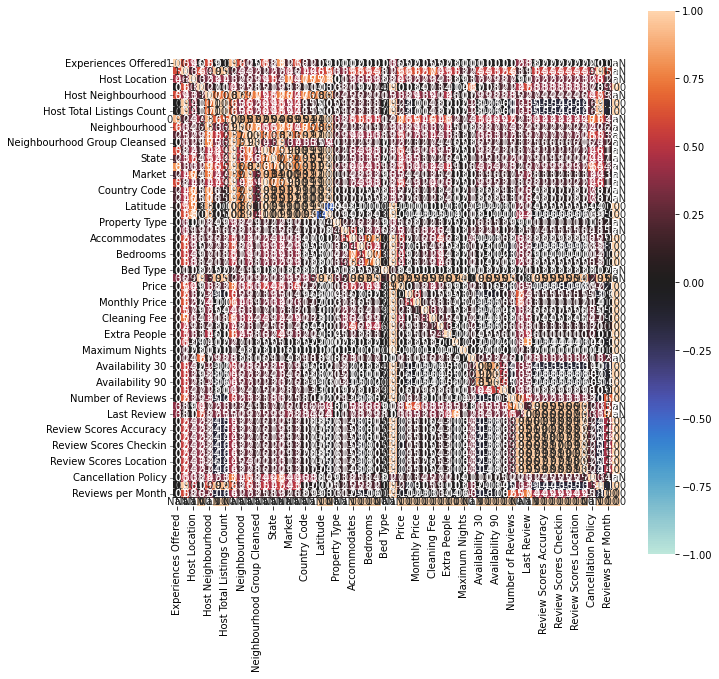

In [21]:
complete_correlation= associations(df, filename= './complete_correlation.png', figsize=(10,10))

In [22]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Experiences Offered,Host Since,Host Location,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
Experiences Offered,1.00,0.59,0.46,0.01,0.59,0.01,0.01,0.92,0.60,0.25,0.00,0.58,0.23,0.81,0.21,0.58,0.21,0.21,0.09,0.01,0.00,0.00,0.02,0.01,0.01,0.01,0.00,0.36,0.05,0.02,0.01,0.05,0.05,0.02,0.03,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.02,0.38,0.38,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.00,0.01,0.01,0.00
Host Since,0.59,1.00,0.34,0.60,0.43,0.95,0.95,0.24,0.34,0.32,0.31,0.22,0.37,0.30,0.46,0.21,0.46,0.46,0.55,0.60,0.31,0.39,0.58,0.59,0.54,0.58,0.11,0.29,0.60,0.61,0.62,0.57,0.70,0.49,0.51,0.53,0.22,0.24,0.54,0.53,0.52,0.54,0.63,0.19,0.11,0.54,0.54,0.54,0.54,0.54,0.54,0.54,0.50,0.96,0.58,0.00
Host Location,0.46,0.34,1.00,0.32,0.33,0.41,0.41,0.32,0.26,0.29,0.29,0.41,0.54,0.31,0.74,0.41,0.75,0.75,0.73,0.80,0.00,0.19,0.36,0.35,0.39,0.38,0.08,0.26,0.49,0.32,0.32,0.29,0.34,0.23,0.33,0.09,0.03,0.17,0.32,0.29,0.28,0.27,0.29,0.00,0.07,0.32,0.32,0.32,0.32,0.32,0.33,0.32,0.38,0.51,0.26,0.00
Host Response Rate,0.01,0.60,0.32,1.00,0.27,0.10,0.10,0.43,0.25,0.28,0.15,0.21,0.19,0.29,0.13,0.21,0.10,0.10,0.03,-0.03,0.08,0.20,0.19,0.02,0.07,0.14,0.02,0.97,0.01,0.03,0.04,0.07,0.13,0.14,0.11,-0.04,0.00,0.67,0.01,0.08,0.12,0.21,0.23,0.47,0.58,0.38,0.38,0.38,0.38,0.38,0.38,0.37,0.28,0.09,0.32,1.00
Host Neighbourhood,0.59,0.43,0.33,0.27,1.00,0.70,0.70,0.87,0.89,0.71,0.75,0.48,0.52,0.76,0.72,0.47,0.76,0.76,0.86,0.89,0.24,0.25,0.26,0.22,0.20,0.20,0.15,0.31,0.38,0.29,0.41,0.35,0.40,0.23,0.46,0.10,0.07,0.09,0.29,0.28,0.28,0.28,0.35,0.22,0.27,0.24,0.24,0.24,0.24,0.24,0.26,0.24,0.47,0.59,0.31,0.00
Host Listings Count,0.01,0.95,0.41,0.10,0.70,1.00,1.00,0.65,0.36,0.52,0.36,0.49,0.48,0.55,0.42,0.49,0.15,0.15,0.00,0.05,0.09,0.16,0.23,0.23,0.18,0.17,0.02,0.95,0.23,-0.10,-0.01,0.04,0.18,0.07,0.01,0.02,0.01,0.28,-0.02,-0.05,-0.06,0.00,-0.12,0.31,0.35,-0.15,-0.15,-0.14,-0.16,-0.16,-0.14,-0.16,0.33,0.92,-0.16,1.00
Host Total Listings Count,0.01,0.95,0.41,0.10,0.70,1.00,1.00,0.65,0.36,0.52,0.36,0.49,0.48,0.55,0.42,0.49,0.15,0.15,0.00,0.05,0.09,0.16,0.23,0.23,0.18,0.17,0.02,0.95,0.23,-0.10,-0.01,0.04,0.18,0.07,0.01,0.02,0.01,0.28,-0.02,-0.05,-0.06,0.00,-0.12,0.31,0.35,-0.15,-0.15,-0.14,-0.16,-0.16,-0.14,-0.16,0.33,0.92,-0.16,1.00
Street,0.92,0.24,0.32,0.43,0.87,0.65,0.65,1.00,0.95,0.87,0.92,0.95,0.94,0.96,0.89,0.95,0.94,0.94,1.00,1.00,0.38,0.28,0.51,0.58,0.51,0.50,0.14,0.22,0.70,0.55,0.61,0.46,0.61,0.48,0.62,0.27,0.14,0.33,0.50,0.46,0.45,0.42,0.52,0.23,0.30,0.43,0.43,0.43,0.43,0.43,0.45,0.43,0.71,0.63,0.41,0.00
Neighbourhood,0.60,0.34,0.26,0.25,0.89,0.36,0.36,0.95,1.00,0.77,0.80,0.50,0.52,0.79,0.71,0.48,0.75,0.75,0.86,0.89,0.24,0.21,0.23,0.20,0.19,0.17,0.19,0.30,0.38,0.29,0.40,0.31,0.37,0.21,0.45,0.10,0.08,0.08,0.28,0.27,0.27,0.24,0.33,0.24,0.29,0.22,0.22,0.22,0.22,0.22,0.24,0.22,0.40,0.26,0.27,0.00
Neighbourhood Cleansed,0.25,0.32,0.29,0.28,0.71,0.52,0.52,0.87,0.77,1.00,0.98,0.70,0.66,0.82,0.92,0.69,0.92,0.92,1.00,1.00,0.29,0.29,0.40,0.41,0.40,0.38,0.19,0.29,0.50,0.27,0.39,0.31,0.44,0.31,0.38,0.13,0.07,0.10,0.36,0.33,0.31,0.27,0.33,0.19,0.27,0.27,0.27,0.27,0.27,0.27,0.30,0.28,0.58,0.53,0.33,0.00


In [23]:
corr_matrix = df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all')
corr_triu = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(np.bool))
corr_triu
corr_triu = corr_triu.stack()
corr_triu2 = corr_triu[(corr_triu != 1.0)&((corr_triu > 0.85)|(corr_triu < -0.85))]
pd.set_option("display.max_rows", 150)
print(pd.DataFrame(corr_triu2))
correl = pd.DataFrame(corr_triu2)
correl.to_csv('./corr.csv', sep=';', decimal='.', index=False)

                                                                    0
Experiences Offered          Street                          0.920586
Host Since                   Host Listings Count             0.949342
                             Host Total Listings Count       0.949342
                             Calculated host listings count  0.962958
Host Response Rate           Amenities                       0.965477
Host Neighbourhood           Street                          0.868129
                             Neighbourhood                   0.887662
                             Latitude                        0.859035
                             Longitude                       0.894545
Host Listings Count          Host Total Listings Count       1.000000
                             Amenities                       0.947592
                             Calculated host listings count  0.919162
Host Total Listings Count    Amenities                       0.947592
                    

En función de los datos de la matriz de correlación se eliminan de train las variables con una alta correlación entre ellas. Es decir las que tienen un nivel superior al 85%. Y además se elimina la variable Geolocation porque no es más que los datos de longitud y latitud juntos. Y Calendar Update no me da mucha información.

In [24]:
df = pd.DataFrame.drop(df, columns=[
    'Amenities',
    'Availability 60',
    'Availability 90',
    'City',
    'Country',
    'Country Code',
    'State',
    'Street',
    'Zipcode',
    'First Review',
    'Last Review',
    'Host Listings Count',
    'Host Neighbourhood',
    'Host Response Rate',
    'Calculated host listings count',
    'Last Review',
    'Market',
    'Neighbourhood',
    'Neighbourhood Cleansed',
    'Neighbourhood Group Cleansed',
    'Review Scores Accuracy',
    'Review Scores Checkin',
    'Review Scores Cleanliness',
    'Review Scores Communication',
    'Review Scores Location',
    'Review Scores Rating',
    'Smart Location',
    'Geolocation',
    'Calendar Updated'
])
df.shape[1]

28

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Total Listings Count,11821.0,12.754420,34.578895,0.000000,1.000000,2.000000,6.000000,519.000000
Latitude,11824.0,40.491628,4.701030,-37.851182,40.409758,40.419331,40.430778,55.966912
Longitude,11824.0,-3.776863,14.014695,-123.124429,-3.707538,-3.700763,-3.683917,153.371427
Accommodates,11824.0,3.277486,2.093973,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11780.0,1.285229,0.664691,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11804.0,1.344290,0.905180,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11787.0,2.049122,1.623489,1.000000,1.000000,2.000000,2.000000,16.000000
Price,11809.0,73.712592,71.624844,9.000000,34.000000,55.000000,87.000000,969.000000
Weekly Price,2881.0,378.437348,194.751472,70.000000,220.000000,350.000000,500.000000,999.000000
Monthly Price,2869.0,1432.390728,1236.992934,250.000000,720.000000,1200.000000,1750.000000,25000.000000


In [25]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['Experiences Offered',
 'Host Since',
 'Host Location',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy']

Creo una variable nueva que me convierte una variable fecha como es Host Since en una numerica que es los días de diferencia al final del año del valor máximo. Antes se rellenan los datos ausentes con el valor de cero

In [26]:
df['Host Since'] = df['Host Since'].astype('datetime64[ns]')
print (df['Host Since'].max())

2017-04-07 00:00:00


In [27]:
from datetime import datetime
import re

df['Host Since'].fillna(0)
d = datetime.strptime("2017-12-31", "%Y-%m-%d")
df['Diferencia dias'] = ((d - df['Host Since'])).astype('string')
df['Diferencia dias'] = df['Diferencia dias'].str.extract('([0-9]+)')
df['Diferencia dias'] = pd.to_numeric(df['Diferencia dias'])
df = pd.DataFrame.drop(df, columns=[
     'Host Since'                               
])
print(df['Diferencia dias'])

0         993.0
1         527.0
2         532.0
3        1333.0
4        2155.0
          ...  
11819     280.0
11820    1001.0
11821     632.0
11822     564.0
11823     833.0
Name: Diferencia dias, Length: 11824, dtype: float64


Obtenemos el valor máximo de Host Since y se crea la variable días de diferencia que son los días que existen respecto al día final del año del valor máximo

Para el resto de variables categoricas, los datos ausentes los cambio por su valor de la moda y después lo que hago es convertirlos a numerico con un encoder label.

In [28]:
from sklearn.preprocessing import LabelEncoder
cols = ['Experiences Offered',
 'Host Location',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

df.head()

,Experiences Offered,Host Location,Host Total Listings Count,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,...,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Value,Cancellation Policy,Reviews per Month,Diferencia dias
0,2,36,2.0,40.407732,-3.684819,0,0,4,1.0,1.0,...,0,2,1125,9,117,12,9.0,2,0.50,993.0
1,2,255,1.0,40.415802,-3.705340,0,0,4,1.0,1.0,...,0,1,1125,15,208,20,10.0,0,2.43,527.0
2,2,255,16.0,40.389048,-3.740374,0,2,1,1.5,1.0,...,0,3,30,14,140,0,NaN,2,NaN,532.0
3,2,255,114.0,40.412814,-3.703052,0,1,2,3.0,1.0,...,0,10,1125,0,311,0,NaN,4,NaN,1333.0
4,2,255,2.0,40.438631,-3.713716,0,1,2,1.0,1.0,...,10,1,1125,7,337,97,9.0,4,2.08,2155.0


Reemplazo los valores ausentes por la moda en todo el dataset

In [29]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
df.head()

,Experiences Offered,Host Location,Host Total Listings Count,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,...,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Value,Cancellation Policy,Reviews per Month,Diferencia dias
0,2,36,2.0,40.407732,-3.684819,0,0,4,1.0,1.0,...,0,2,1125,9,117,12,9.0,2,0.50,993.0
1,2,255,1.0,40.415802,-3.705340,0,0,4,1.0,1.0,...,0,1,1125,15,208,20,10.0,0,2.43,527.0
2,2,255,16.0,40.389048,-3.740374,0,2,1,1.5,1.0,...,0,3,30,14,140,0,10.0,2,1.00,532.0
3,2,255,114.0,40.412814,-3.703052,0,1,2,3.0,1.0,...,0,10,1125,0,311,0,10.0,4,1.00,1333.0
4,2,255,2.0,40.438631,-3.713716,0,1,2,1.0,1.0,...,10,1,1125,7,337,97,9.0,4,2.08,2155.0


Hacemos lo mismo que hemos realizado en train en test. Es decir, eliminamos las variables y con las categoricas las transformamos igual que en train


In [31]:
dt = pd.read_csv('./test.csv', sep=';', decimal='.')

In [32]:
#Eliminación de las variables
dt = pd.DataFrame.drop(dt, columns=[
    'Has Availability',
    'Host Acceptance Rate',
    'Jurisdiction Names',
    'License',
    'Square Feet',
    'Amenities',
    'Availability 60',
    'Availability 90',
    'City',
    'Country',
    'Country Code',
    'State',
    'Street',
    'Zipcode',
    'First Review',
    'Last Review',
    'Host Listings Count',
    'Host Neighbourhood',
    'Host Response Rate',
    'Calculated host listings count',
    'Last Review',
    'Market',
    'Neighbourhood',
    'Neighbourhood Cleansed',
    'Neighbourhood Group Cleansed',
    'Review Scores Accuracy',
    'Review Scores Checkin',
    'Review Scores Cleanliness',
    'Review Scores Communication',
    'Review Scores Location',
    'Review Scores Rating',
    'Smart Location',
    'Geolocation',
    'Calendar Updated'
])

In [33]:
#Crear la variable nueva
dt['Host Since'] = dt['Host Since'].astype('datetime64[ns]')
dt['Host Since'].fillna(0)
dt['Diferencia dias'] = ((d - dt['Host Since'])).astype('string')
dt['Diferencia dias'] = dt['Diferencia dias'].str.extract('([0-9]+)')
dt['Diferencia dias'] = pd.to_numeric(dt['Diferencia dias'])
dt = pd.DataFrame.drop(dt, columns=[
     'Host Since'     
])

In [34]:
# Hago el encoder labels
dt[cols] = dt[cols].apply(LabelEncoder().fit_transform)

In [35]:
#Los datos ausentes toman el valor de la moda
for column in df.columns:
    dt[column].fillna(dt[column].mode()[0], inplace=True)

In [36]:
print(f'Dimensiones del dataset de training: {df.shape}')
print(f'Dimensiones del dataset de test: {dt.shape}')

Dimensiones del dataset de training: (11824, 28)
Dimensiones del dataset de test: (2956, 28)


Elimino outliers de la variable Precio, ya que es la variable a predecir. Utilizamos un criterio estadístico para eliminar los outliers y presuponiendo que sigue una distribución Gaussiana. Como da datos negativos con los límites de los cuartiles se ha ajustado en función del gráfico en que el precio sea mayor o igual a 30 y menor o igual a 140




In [37]:
# IQR
Q1 = np.percentile(df['Price'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['Price'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print("Precio: ", df['Price'].shape, dt['Price'].shape,)
# Se seleccionan los superiores a la banda inferior
sup = (Q3+1.5*IQR)
print (sup)
# Se selecciona los inferiores a la banda superior
inf = (Q1-1.5*IQR)
print (inf)
#Se eliminan los outliers
df.drop(df[(df['Price'] <=30)].index, inplace=True)
df.drop(df[(df['Price'] >=140)].index, inplace=True)
dt.drop(dt[(dt['Price'] <=30)].index, inplace=True)
dt.drop(dt[(dt['Price'] >=140)].index, inplace=True)
print("Nuevo train test: ", df.shape, dt.shape)

Precio:  (11824,) (2956,)
166.5
-45.5
Nuevo train test:  (7968, 28) (1966, 28)


Veo con un gráfico de cajones que no existen outliers para dicha variable

<AxesSubplot:xlabel='Price'>

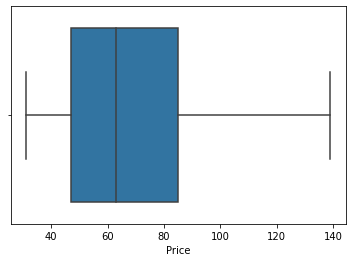

In [38]:
sns.boxplot(df['Price'])

Con una regulación Lasso con validación cruzada vemos si se puede eliminar alguna variable ya que permite realizar una selección de características.

In [39]:
df_new= pd.concat([df, dt], axis=0)
df_new.shape

(9934, 28)

In [40]:
df_new.columns


Index(['Experiences Offered', 'Host Location', 'Host Total Listings Count',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 365', 'Number of Reviews', 'Review Scores Value',
       'Cancellation Policy', 'Reviews per Month', 'Diferencia dias'],
      dtype='object')

In [41]:
df_new = df_new[['Price','Experiences Offered', 'Host Location', 'Host Total Listings Count',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type','Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 365', 'Number of Reviews', 'Review Scores Value',
       'Cancellation Policy', 'Reviews per Month', 'Diferencia dias']]

In [42]:
df_new.columns

Index(['Price', 'Experiences Offered', 'Host Location',
       'Host Total Listings Count', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Weekly Price', 'Monthly Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 365',
       'Number of Reviews', 'Review Scores Value', 'Cancellation Policy',
       'Reviews per Month', 'Diferencia dias'],
      dtype='object')

In [43]:
# convertimos el DataFrame al formato necesario para scikit-learn
data = df_new.values

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = df_new.columns[1:]


In [44]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


# Dividimos los datos en entrenamiento y test (80 training, 20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)


Datos entrenamiento:  (7947, 27)
Datos test:  (1987, 27)


best mean cross-validation score: -362.699
best parameters: {'alpha': 1e-05}


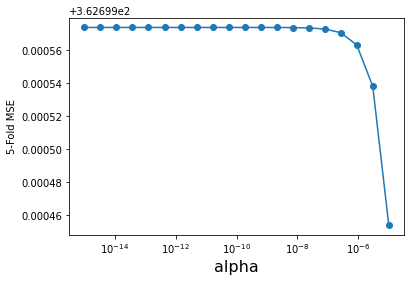

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-15,-5,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 20)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 355
MSE Modelo Lasso (test) : 337
RMSE Modelo Lasso (train): 18.8
RMSE Modelo Lasso (test) : 18.4
Experiences Offered 0.11523305763510355
Host Location -1.0034608332060713
Host Total Listings Count 4.078482535336311
Latitude -1.6479955196335911
Longitude -2.265855765516377
Property Type 0.08842428545842342
Room Type -7.191608098129375
Accommodates 5.094670531468797
Bathrooms 0.8137034174466451
Bedrooms 3.0472093400301126
Beds -0.3348134317836131
Bed Type 1.3869700685455544
Weekly Price 5.284814987915582
Monthly Price 2.0031580763517924
Security Deposit 1.5950960442038538
Cleaning Fee 2.3762244238753008
Guests Included 1.4349805531252142
Extra People -1.3254660512901513
Minimum Nights -0.4189845865893993
Maximum Nights 0.022677233925418837
Availability 30 2.4310617978717484
Availability 365 0.12335876560878993
Number of Reviews -1.8823911272244815
Review Scores Value 2.8556046378456235
Cancellation Policy -0.1897287330953817
Reviews per Month -0.859395734307832

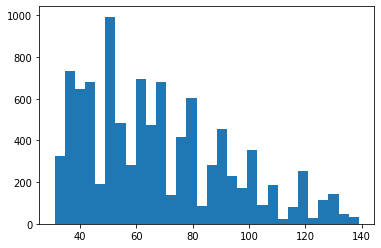

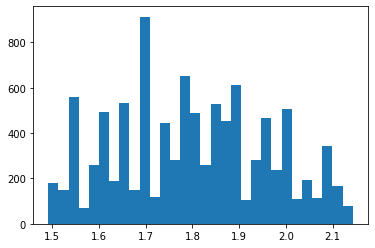

In [47]:
plt.hist(df_new.Price, bins=30)
plt.show()

plt.hist(np.log10(df_new.Price), bins=30)
plt.show()

Comprobamos con la logaritmica, ya que por el histograma se asemeja más a una gaussiana si existe una mejora o es peor el RMSE

In [48]:
y = np.log10(data[:,0:1])     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = df_new.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

Datos entrenamiento:  (7450, 27)
Datos test:  (2484, 27)


best mean cross-validation score: -0.014
best parameters: {'alpha': 1e-05}


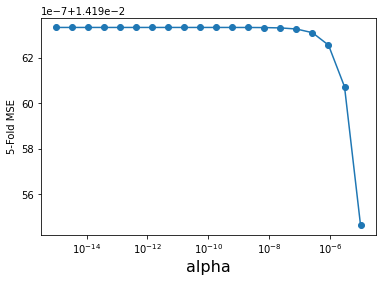

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-15,-5,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))


mseTrainModelLasso = mean_squared_error(10**y_train,10**ytrainLasso)
mseTestModelLasso = mean_squared_error(10**y_test,10**ytestLasso)

print('Antitransformada MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('Antitransformada MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('Antitransformada RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('Antitransformada RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 0.0139
MSE Modelo Lasso (test) : 0.0131
RMSE Modelo Lasso (train): 0.118
RMSE Modelo Lasso (test) : 0.115
Antitransformada MSE Modelo Lasso (train): 389
Antitransformada MSE Modelo Lasso (test) : 358
Antitransformada RMSE Modelo Lasso (train): 19.7
Antitransformada RMSE Modelo Lasso (test) : 18.9
Experiences Offered 0.0008393743302452766
Host Location -0.006392746578120018
Host Total Listings Count 0.022135351443967645
Latitude -0.011426425581069623
Longitude -0.014633268124978043
Property Type -0.00015330535158634861
Room Type -0.056249140085009225
Accommodates 0.03454138827678622
Bathrooms 0.0006738600550728189
Bedrooms 0.016815748481525762
Beds -0.004090085024908846
Bed Type 0.00857624376837521
Weekly Price 0.03251821928369746
Monthly Price 0.011016767836656253
Security Deposit 0.009431464504275901
Cleaning Fee 0.01346684504259767
Guests Included 0.007950039316970667
Extra People -0.007595236244145764
Minimum Nights -0.002207880560791964
Maximum Nights -0.0

Con la logaritmica da un error mayor y no se simplifica más el modelo. Con lo cual se selecciona el modelo que no es logaritmico. Y a la hora de quitar características no se puede quitar ninguna del modelo.

Dejo como código los dos que intente realizar para features selección pero que por procesador de ordenador y por tiempo no los pude lanzar. Si que el código se puede lanzar, por que el código no me dio problema, pero por tiempo de entrega de la práctica no lo he podido ver los resultados.

Este primero es con RandomizerSearch CV y 20 iteraciones. Con medida del ajuste la curva ROC

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.svm import SVC as svc 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats
import scipy as sc 

 

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = df_new.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)




pipeline = make_pipeline(StandardScaler(), svc(random_state=1))

# Create parameter distribution using scipy.stats module

param_distributions = [{'svc__C': sc.stats.expon(scale=100),
                        'svc__gamma': sc.stats.expon(scale=.1),
                        'svc__kernel': ['rbf']},
                       {'svc__C': sc.stats.expon(scale=100),
                        'svc__kernel': ['linear']}]

# Create an instance of RandomizedSearchCV

rs = RandomizedSearchCV(estimator=pipeline, param_distributions = param_distributions,
                        cv = 10, scoring = 'accuracy',n_iter = 20, refit = True, n_jobs = 1,
                       random_state=1)

# Fit the RandomizedSearchCV estimator

rs.fit(X_train, y_train)

print('Test Accuracy: %0.3f' % rs.score(X_test, y_test))

# Print best parameters

print(rs.best_params_)

# Print the best score

print(rs.best_score_)



Este lo deje toda la noche pero es lo que comentaste en clase del número de las variables y el tamaño del data set lo tuve que parar. Este es SVC con medida de ajuste la accuracy

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = df_new.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)


svc = SVC(kernel='linear')

rfecv = RFECV(estimator=svc, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

plt.figure()
plt.xlabel("# variables")
plt.ylabel("5-fold ACC")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, '-o')
plt.show()

print('Número optimo de variables: ', rfecv.n_features_)
print('Variables seleccionadas: ',[f for f in features[rfecv.support_]] )
print('Acc (TEST): %0.2f'%rfecv.score(X_test,y_test))

# Modelado 

Ahora pasamos a analizar cual es el mejor modelo que se puede ajustar a los datos limpios del data set airbnb. Como la función objetivo es obtener un valor tenemos que utilizar modelos de regresión.

In [92]:
# convertimos el DataFrame al formato necesario para scikit-learn
data = df_new.values

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = df_new.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 2)

# Generamos las métricas evaluadoras del modelo

def evaluate_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    from sklearn.metrics import median_absolute_error
    print("Median Absolute Error: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE)) 


In [93]:
!pip install sklearn
import sklearn

In [94]:
!pip install scipy
import scipy


In [95]:
!pip install  graphviz && pip install pydot
import graphviz

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create the pipeline (regressor)
my_pipeline_RF = make_pipeline(RandomForestRegressor(random_state=42))

# Fit the model
my_pipeline_RF.fit(X_train, y_train)



Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [97]:
result_RF_train = evaluate_model(my_pipeline_RF, X_train, y_train)
result_RF_train

Median Absolute Error: 3.22
RMSE: 5.96


In [98]:
result_RF_test = evaluate_model(my_pipeline_RF, X_test, y_test)

Median Absolute Error: 8.21
RMSE: 15.92


El Random Forest tiene una buen ajuste en train pero no tanto en test.

In [118]:
from sklearn.tree import DecisionTreeRegressor

DTree = DecisionTreeRegressor(max_depth = 4) 
DTree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4)

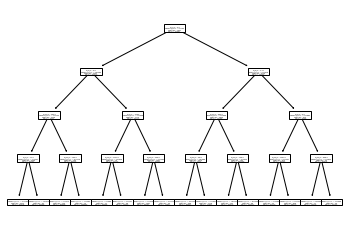

In [119]:
from sklearn import tree
tree.plot_tree(DTree)
plt.show()

In [113]:
conda install graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/nacho/opt/anaconda3/envs/pythonenv

  added / updated specs:
    - graphviz


The following NEW packages will be INSTALLED:

  cairo              pkgs/main/osx-64::cairo-1.14.12-he60d9cb_2
  expat              pkgs/main/osx-64::expat-2.4.4-he9d5cce_0
  fontconfig         pkgs/main/osx-64::fontconfig-2.12.6-h9850fc5_0
  freetype           pkgs/main/osx-64::freetype-2.8-h12048fb_1
  fribidi            pkgs/main/osx-64::fribidi-1.0.10-haf1e3a3_0
  gettext            pkgs/main/osx-64::gettext-0.21.0-h7535e17_0
  glib               pkgs/main/osx-64::glib-2.69.1-h8346a28_1
  graphite2          pkgs/main/osx-64::graphite2-1.3.14-h38d11af_0
  graphviz           pkgs/main/osx-64::graphviz-2.40.1-h0a44026_0
  harfbuzz           p

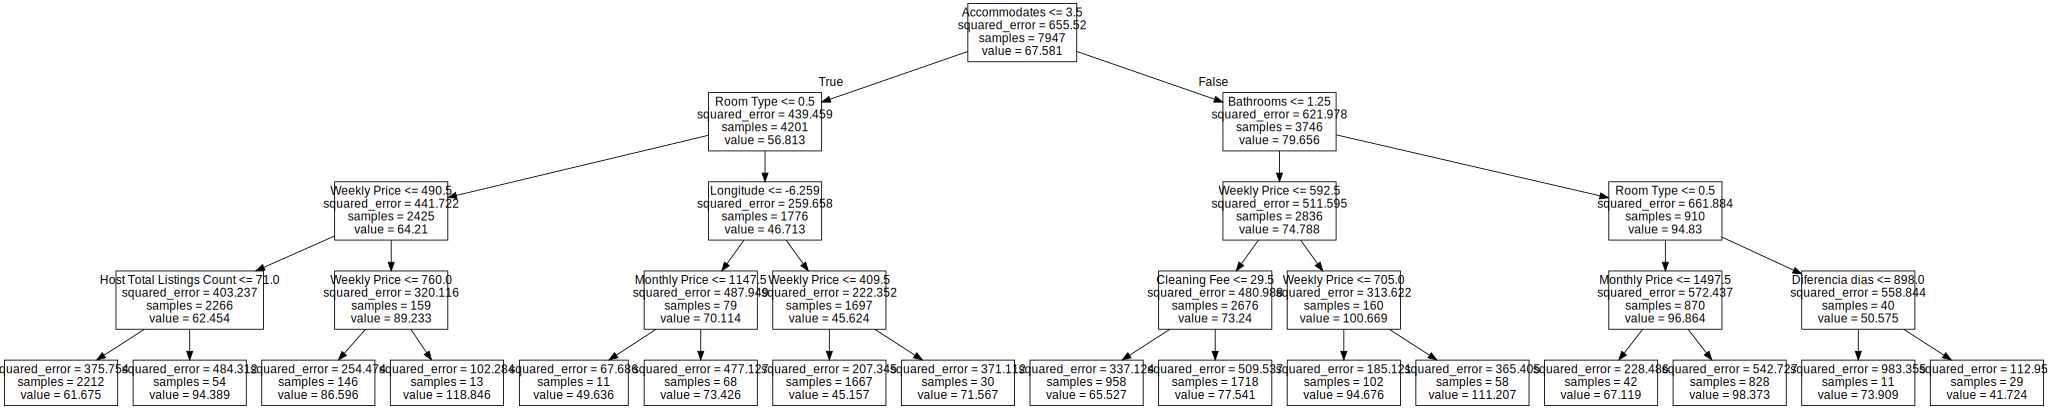

In [120]:
dot_data = tree.export_graphviz(DTree, feature_names = df_new.columns[1:])
graph = graphviz.Source(dot_data)
graph

In [121]:
result_DTree_train = evaluate_model(DTree, X_train, y_train)
result_DTree_train

Median Absolute Error: 11.67
RMSE: 19.42


In [123]:
result_DTree_test = evaluate_model(DTree, X_test, y_test)
result_DTree_test

Median Absolute Error: 11.67
RMSE: 19.77


El error es peor que en Random Forest, lo que si es mucho más visual ya que se ve a simple vista cuales son las variables más importantes para el modelo. Con lo cual es mucho más práctico.

Ahora se utiliza un modelo Bagging Regressor

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................base_estimator__max_depth=1; total time=   7.8s
[CV] END ........................base_estimator__max_depth=1; total time=   7.5s
[CV] END ........................base_estimator__max_depth=1; total time=   7.4s
[CV] END ........................base_estimator__max_depth=1; total time=   7.4s
[CV] END ........................base_estimator__max_depth=1; total time=   7.9s
[CV] END ........................base_estimator__max_depth=2; total time=  12.3s
[CV] END ........................base_estimator__max_depth=2; total time=  12.4s
[CV] END ........................base_estimator__max_depth=2; total time=  11.9s
[CV] END ........................base_estimator__max_depth=2; total time=  11.5s
[CV] END ........................base_estimator__max_depth=2; total time=  11.5s
[CV] END ........................base_estimator__max_depth=3; total time=  15.3s
[CV] END ........................base_estimator_

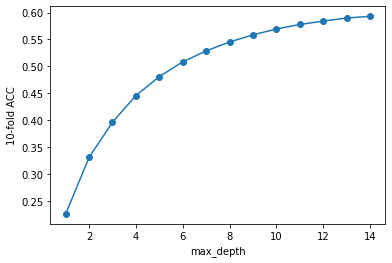

In [124]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'base_estimator__max_depth': maxDepth} #  {'max_depth': maxDepth, 'n_estimators': [100, 200, 500, 1000]}

grid = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [125]:
maxDepthOptimo = 8#grid.best_params_['max_depth']
bagModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),n_estimators=200).fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.6327997213346653
Test:  0.5467622702516125


In [126]:
result_bagModel_train = evaluate_model(bagModel, X_train, y_train)
result_bagModel_train

Median Absolute Error: 9.15
RMSE: 15.51


In [127]:
result_bagModel_test = evaluate_model(bagModel, X_test, y_test)
result_bagModel_test

Median Absolute Error: 9.53
RMSE: 17.18


Con el modelo Bagging no se mejoran los datos del Random Forest. Con lo cual el modelo seleccionado es Random Forest.

##CONCLUSIÓN FINAL:

En relación al modelo el que ha realizado un menor RMSE ha sido el más complejo ya que es el modelo de Random Forest. Pero se pierde el control de la información en relación a la variables como afectan ya que es una caja oscura el algoritmo de Random Forest. 
En relación al caso el ML con Python es mucho más potente que con R pero es más intensivo en la utilización de los recursos de la máquina y en este caso no es un dataset de mucho tamaño. Por eso ahora entiendo cada vez más la importancia de herramientas como Spark para utilizarlas con los datasets de gran tamaño. 